# Naive Forecasting

<h3>Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [5]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)
    
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

<h3>Trend and Seasonality

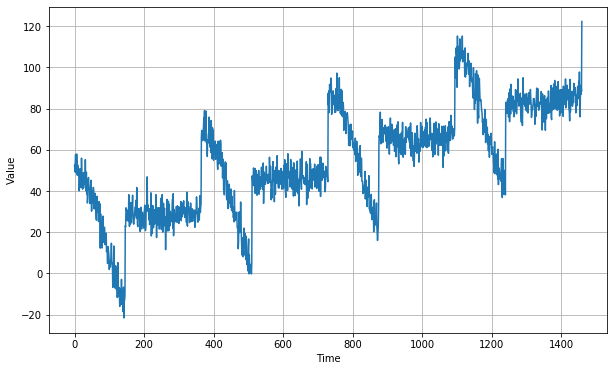

In [7]:
time = np.arange(4*365 + 1)
slope = 0.05
baseline = 10
amplitude = 40

series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed = 42)
series += noise

plt.figure(figsize = (10, 6))
plot_series(time, series)
plt.show()

In [8]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

<h3>Naive Forecast

In [9]:
naive_forecast = series[split_time - 1:-1]

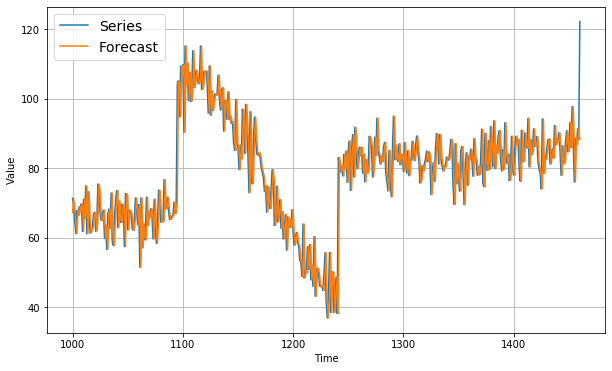

In [14]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label="Forecast")

In [15]:
naive_forecast

array([ 67.19673417,  71.34471371,  68.98551494,  64.67519969,
        61.15735421,  67.89843149,  66.39030291,  68.91468503,
        67.63070049,  69.7190049 ,  61.81174015,  71.0918342 ,
        65.51008011,  74.915873  ,  61.11138224,  73.25515699,
        65.58317034,  61.35506451,  62.211521  ,  63.04826468,
        66.79013535,  67.30303871,  61.8401661 ,  64.60694517,
        75.46036708,  73.40727142,  66.97195535,  65.00137499,
        65.43277204,  67.92169834,  59.76187207,  63.61091006,
        56.57705977,  66.9385108 ,  68.20101574,  62.57196852,
        72.88092156,  58.90546664,  57.73594625,  66.20382215,
        70.34101191,  73.54932937,  62.85965153,  70.57206865,
        65.01092175,  64.36533348,  69.67198015,  68.54070825,
        57.42274772,  72.71322451,  72.25699176,  62.25493006,
        67.38816456,  67.90589429,  66.76590023,  62.73798368,
        62.1585591 ,  65.41625898,  71.4352132 ,  68.3172915 ,
        63.77412404,  69.51377508,  51.44083364,  71.45

In [16]:
x_valid

array([ 71.34471371,  68.98551494,  64.67519969,  61.15735421,
        67.89843149,  66.39030291,  68.91468503,  67.63070049,
        69.7190049 ,  61.81174015,  71.0918342 ,  65.51008011,
        74.915873  ,  61.11138224,  73.25515699,  65.58317034,
        61.35506451,  62.211521  ,  63.04826468,  66.79013535,
        67.30303871,  61.8401661 ,  64.60694517,  75.46036708,
        73.40727142,  66.97195535,  65.00137499,  65.43277204,
        67.92169834,  59.76187207,  63.61091006,  56.57705977,
        66.9385108 ,  68.20101574,  62.57196852,  72.88092156,
        58.90546664,  57.73594625,  66.20382215,  70.34101191,
        73.54932937,  62.85965153,  70.57206865,  65.01092175,
        64.36533348,  69.67198015,  68.54070825,  57.42274772,
        72.71322451,  72.25699176,  62.25493006,  67.38816456,
        67.90589429,  66.76590023,  62.73798368,  62.1585591 ,
        65.41625898,  71.4352132 ,  68.3172915 ,  63.77412404,
        69.51377508,  51.44083364,  71.45581837,  57.04

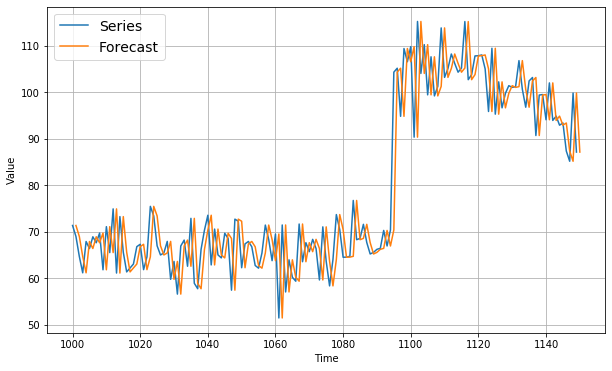

In [19]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150, label="Series")
plot_series(time_valid, naive_forecast, start=1, end=151, label="Forecast")

Now let's compute the mean squared error between the forecasts and the predictions in the validation period

In [20]:
errors = naive_forecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

5.9379085153216735